In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings('ignore')
# for drawing dendogram
import scipy.cluster.hierarchy as ch
# for creating a model
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist

In [230]:
# read the Excel file from your data folder into a data frame
df = pd.read_excel("/Users/cej12/Skrivebord/Untitled Folder/data/country.xlsx", index_col=None, na_values=['NA'])
df

,Country/Territory,Region,...,CL,Total
0,Abkhazia,Eurasia,...,22,39
1,Afghanistan,Asia,...,7,8
2,Albania,Europe,...,39,67
3,Algeria,Africa,...,22,32
4,Andorra,Europe,...,55,93
5,Angola,Africa,...,18,28
6,Antigua and Barbuda,Americas,...,52,85
7,Argentina,Americas,...,50,85
8,Armenia,Eurasia,...,31,54
9,Australia,Asia,...,57,95


In [231]:
# Lets try and make a model on the newest data. So lets select the 2023 edition and start preprocessing from there.
dataset_2023 = df[df.Edition == 2023]
dataset_2023

,Country/Territory,Region,...,CL,Total
0,Abkhazia,Eurasia,...,22,39
1,Afghanistan,Asia,...,7,8
2,Albania,Europe,...,39,67
3,Algeria,Africa,...,22,32
4,Andorra,Europe,...,55,93
5,Angola,Africa,...,18,28
6,Antigua and Barbuda,Americas,...,52,85
7,Argentina,Americas,...,50,85
8,Armenia,Eurasia,...,31,54
9,Australia,Asia,...,57,95


In [232]:
features_all = dataset_2023[['PR', 'CL','A', 'B','C', 'D', 'E', 'F', 'G','Total']]

In [233]:
features_all

,PR,CL,...,G,Total
0,17,22,...,5,39
1,1,7,...,2,8
2,28,39,...,9,67
3,10,22,...,7,32
4,38,55,...,15,93
5,10,18,...,3,28
6,33,52,...,13,85
7,35,50,...,14,85
8,23,31,...,9,54
9,38,57,...,15,95


In [234]:
# Select attributes and convert to numpy
X = features_all[['PR','CL']].values
X

array([[17, 22],
       [ 1,  7],
       [28, 39],
       [10, 22],
       [38, 55],
       [10, 18],
       [33, 52],
       [35, 50],
       [23, 31],
       [38, 57],
       [37, 56],
       [ 2,  7],
       [38, 53],
       [ 2, 10],
       [15, 25],
       [37, 57],
       [ 2,  6],
       [39, 57],
       [34, 53],
       [17, 42],
       [29, 32],
       [27, 39],
       [18, 34],
       [28, 44],
       [30, 42],
       [ 7, 21],
       [33, 46],
       [ 3, 27],
       [ 4, 10],
       [38, 54],
       [ 5, 19],
       [ 6,  9],
       [40, 58],
       [ 3,  4],
       [ 1, 14],
       [38, 56],
       [-2, 11],
       [31, 39],
       [16, 26],
       [ 2, 15],
       [ 4, 15],
       [38, 53],
       [19, 30],
       [-2,  6],
       [35, 49],
       [ 1, 11],
       [38, 54],
       [36, 56],
       [40, 57],
       [ 5, 19],
       [37, 56],
       [27, 41],
       [-1,  4],
       [30, 40],
       [ 6, 12],
       [25, 31],
       [ 0,  5],
       [ 1,  2],
       [38, 56

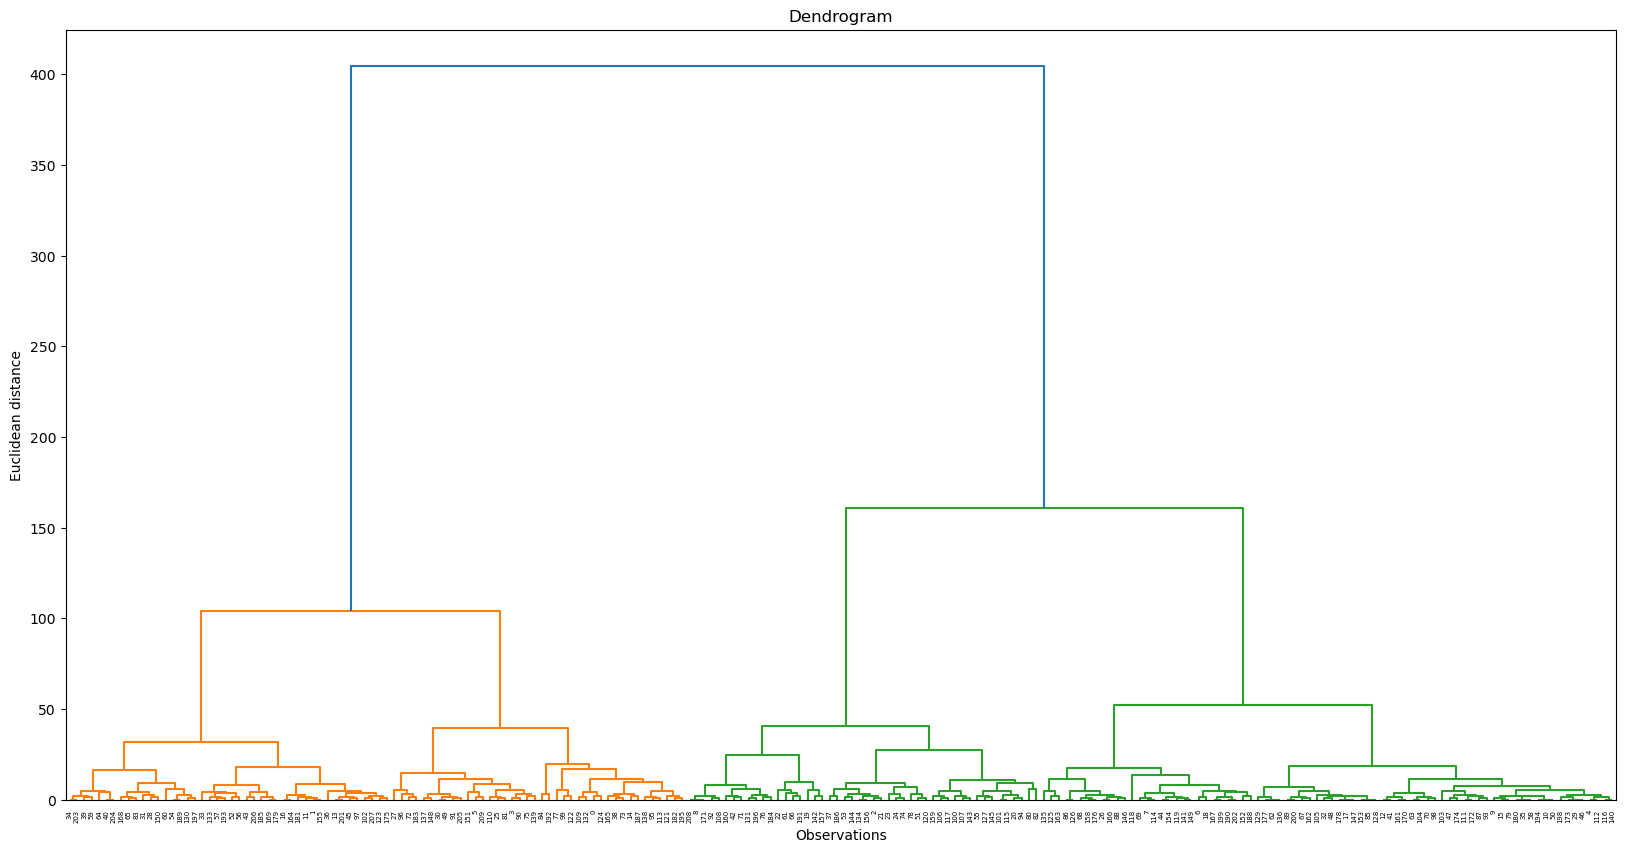

In [12]:
# Use dendogram to find the optimal number of clusters
plt.figure(figsize=(20,10))

dendogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

In [13]:
n_clusters = 2
model = AgglomerativeClustering(n_clusters, metric = 'euclidean', linkage = 'ward')
model.fit(X)

AgglomerativeClustering(metric='euclidean')

In [14]:
Y = model.fit_predict(X)
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

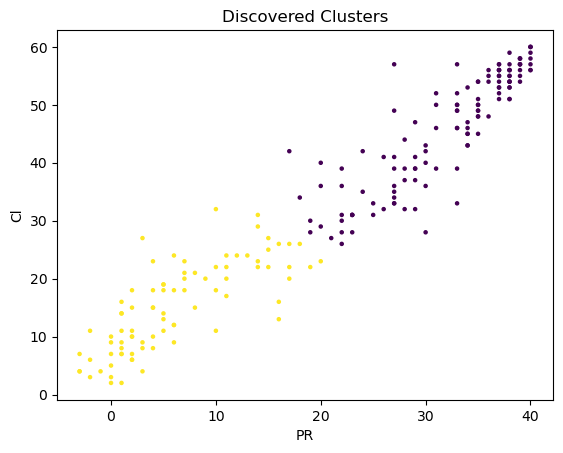

In [19]:
# Visualising the clusters
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], s=5, c=Y, cmap='viridis')
plt.title('Discovered Clusters')
plt.xlabel('PR')
plt.ylabel('Cl')
# plt.legend()
plt.show()

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [66]:
X

array([[17, 22],
       [ 1,  7],
       [28, 39],
       [10, 22],
       [38, 55],
       [10, 18],
       [33, 52],
       [35, 50],
       [23, 31],
       [38, 57],
       [37, 56],
       [ 2,  7],
       [38, 53],
       [ 2, 10],
       [15, 25],
       [37, 57],
       [ 2,  6],
       [39, 57],
       [34, 53],
       [17, 42],
       [29, 32],
       [27, 39],
       [18, 34],
       [28, 44],
       [30, 42],
       [ 7, 21],
       [33, 46],
       [ 3, 27],
       [ 4, 10],
       [38, 54],
       [ 5, 19],
       [ 6,  9],
       [40, 58],
       [ 3,  4],
       [ 1, 14],
       [38, 56],
       [-2, 11],
       [31, 39],
       [16, 26],
       [ 2, 15],
       [ 4, 15],
       [38, 53],
       [19, 30],
       [-2,  6],
       [35, 49],
       [ 1, 11],
       [38, 54],
       [36, 56],
       [40, 57],
       [ 5, 19],
       [37, 56],
       [27, 41],
       [-1,  4],
       [30, 40],
       [ 6, 12],
       [25, 31],
       [ 0,  5],
       [ 1,  2],
       [38, 56

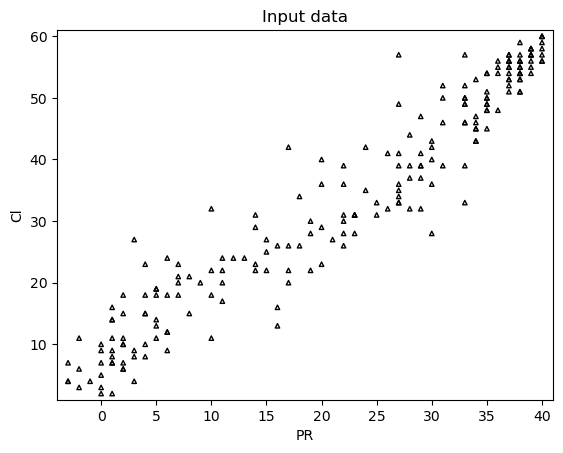

In [67]:
# Plot the input data

# a. creates a frame
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:,0].min()
x_max = X[:,0].max()
# second column
y_min = X[:,1].min()
y_max = X[:,1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

plt.xlabel('PR')
plt.ylabel('Cl')
# scatterplot of the points
plt.scatter(X[:,0], X[:,1], marker='^', facecolors='none', edgecolors='black', s=10)

plt.show()

In [68]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [9.561143049242316, 6.322639129833683, 5.0193271137966535, 4.25728435604944, 3.747884722223204, 3.391168937428291, 3.2039881350356225, 3.0867571788172437]


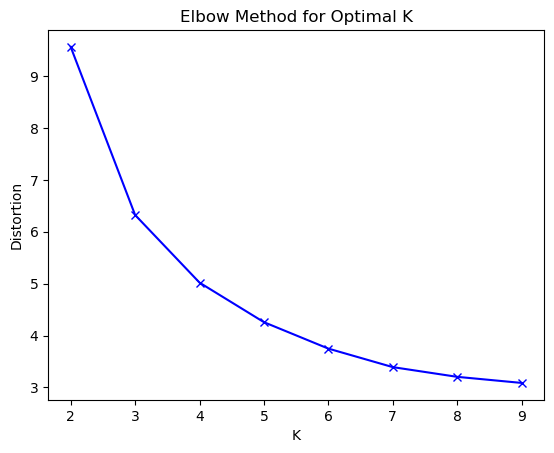

In [69]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [73]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.6433633800962714

Number of clusters = 3
Silhouette score = 0.59969955201897

Number of clusters = 4
Silhouette score = 0.5675687645327083

Number of clusters = 5
Silhouette score = 0.5040336028244168

Number of clusters = 6
Silhouette score = 0.478805662984752

Number of clusters = 7
Silhouette score = 0.46566783984546495

Number of clusters = 8
Silhouette score = 0.43896208722091257

Number of clusters = 9
Silhouette score = 0.4446118416194322


In [86]:
# Optimal number of clusters K
num_clusters = 2

In [87]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [88]:
# Train the KMeans clustering model
kmeans.fit(X)

KMeans(n_clusters=2, n_init=20)

In [89]:
# Predict 2 clusters in X
y = kmeans.predict(X)
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [90]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

[1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1]


Cluster  0 :  (118, 2)


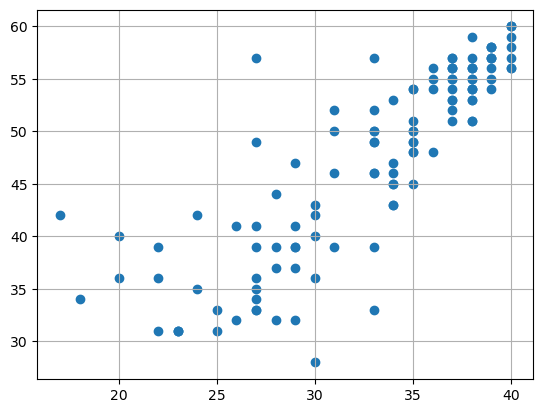

Cluster  1 :  (92, 2)


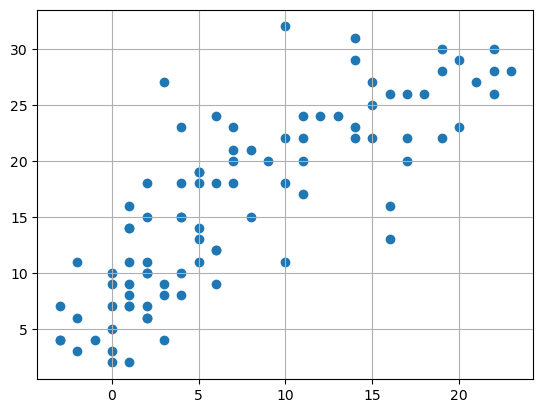

In [91]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

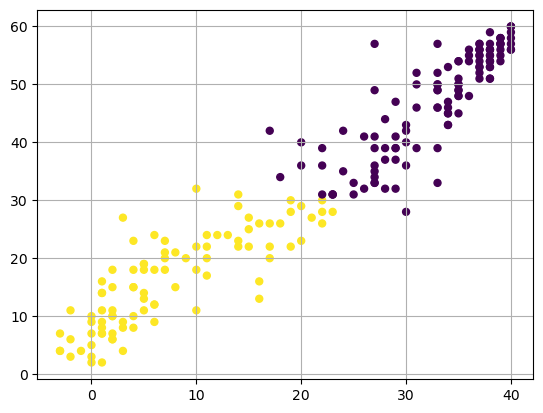

In [92]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='viridis')

plt.grid(True)
plt.show()

In [93]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[32.81355932 47.3220339 ]
 [ 7.52173913 16.33695652]]


In [94]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [95]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans.predict(np.c_[xx,yy])
labels = labels.reshape(x_vals.shape)

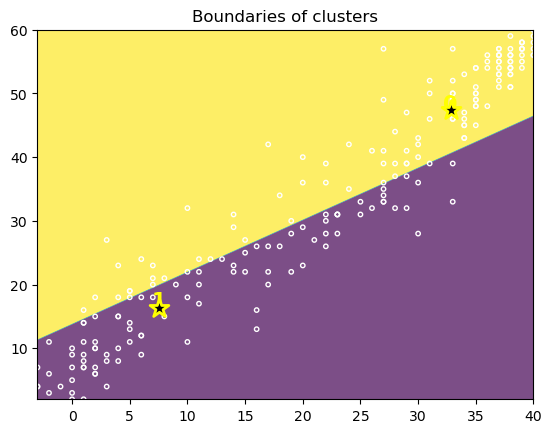

In [104]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='kaiser',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto',alpha=0.7)
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=10) 

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

In [235]:
from sklearn.cluster import  MeanShift, estimate_bandwidth
from scipy.spatial.distance import cdist

import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph

In [236]:
# Bandwidth/radius is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
bandwidth 

8.420430289174481

In [237]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)

MeanShift(bandwidth=8.420430289174481, bin_seeding=True)

In [238]:
# get the calculated values 
labels = msmodel.labels_
labels_unique = np.unique(labels)
labels_unique

array([0, 1, 2, 3], dtype=int64)

In [239]:
n_clusters_ = len(labels_unique)
n_clusters_

4

In [240]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[36.87878788, 54.09090909],
       [ 2.75555556, 11.2       ],
       [26.125     , 35.325     ],
       [10.97142857, 21.54285714]])

In [241]:
# Predict the cluster for all the samples for test
Mean_shift_prediction = msmodel.predict(X)
Mean_shift_prediction

array([3, 1, 2, 3, 0, 3, 0, 0, 2, 0, 0, 1, 0, 1, 3, 0, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 3, 0, 3, 1, 0, 3, 1, 0, 1, 1, 0, 1, 2, 3, 1, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 3, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 1, 3, 0, 2, 0,
       0, 0, 3, 3, 2, 0, 2, 3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 0, 2, 2, 2, 3,
       3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 3, 3, 1, 3, 0, 2, 2, 0, 0, 1, 2,
       3, 1, 2, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 3, 3, 2, 1, 2, 3, 0, 1, 0, 2, 3, 1, 0, 3, 2, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3], dtype=int64)

In [242]:
len(msmodel.labels_)

210

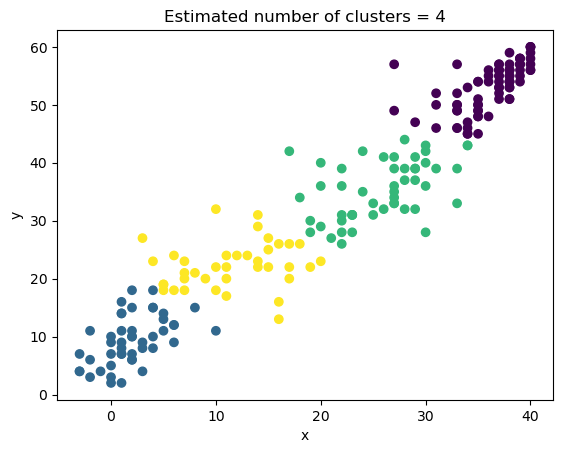

In [243]:
# Generate scatter plot for the training data
# colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

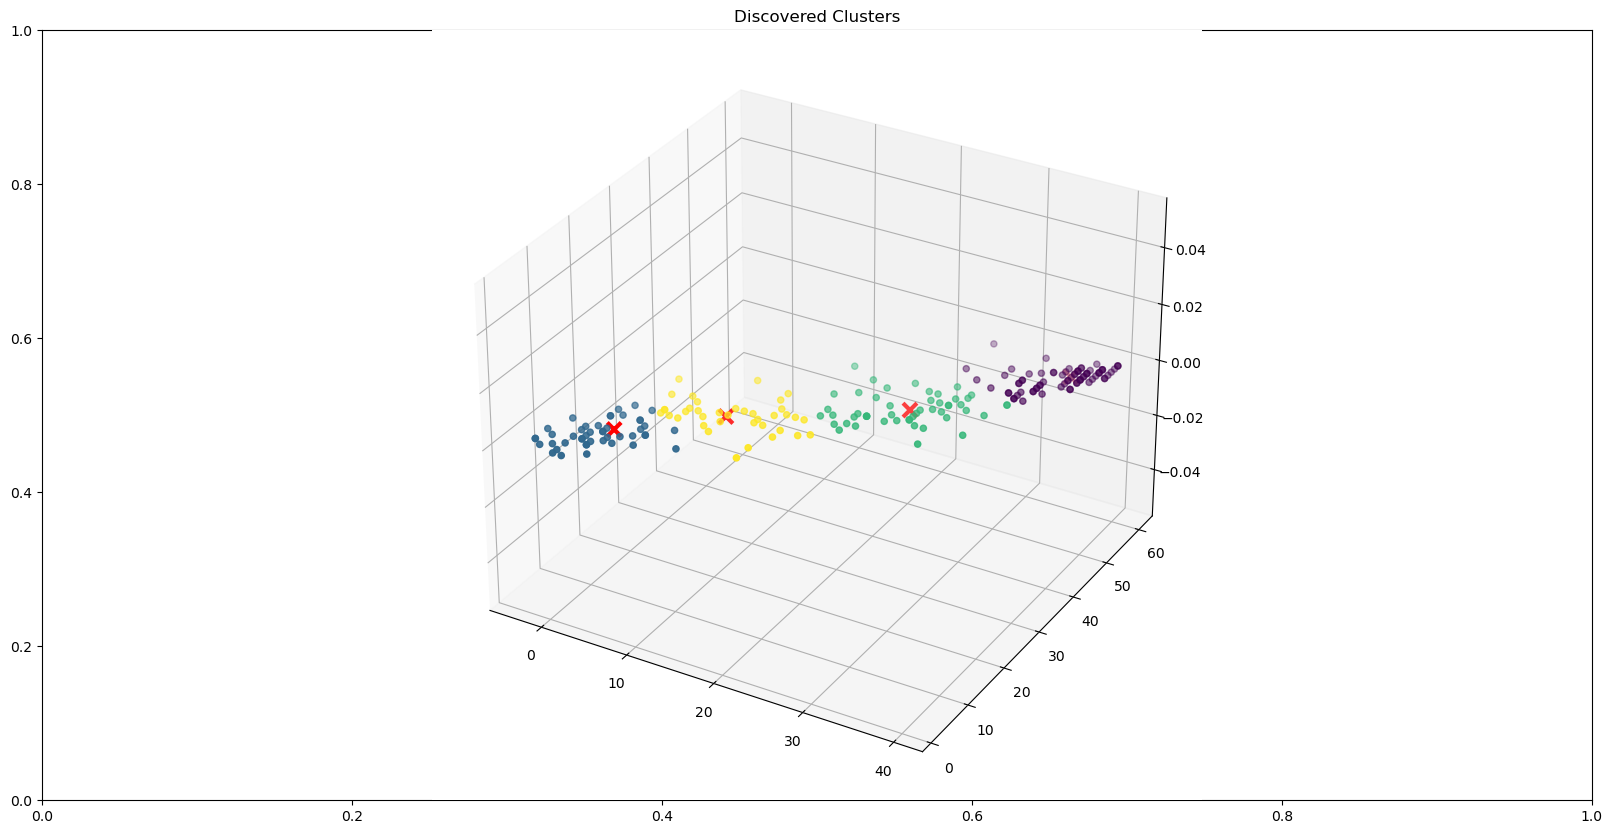

In [244]:
# Visualising the clusters in 3D
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
fig = plt.figure(figsize=(20,10))
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

In [245]:
Mean_shift_prediction

array([3, 1, 2, 3, 0, 3, 0, 0, 2, 0, 0, 1, 0, 1, 3, 0, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 3, 0, 3, 1, 0, 3, 1, 0, 1, 1, 0, 1, 2, 3, 1, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 3, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 1, 3, 0, 2, 0,
       0, 0, 3, 3, 2, 0, 2, 3, 3, 1, 0, 3, 2, 2, 1, 0, 0, 0, 2, 2, 2, 3,
       3, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 3, 3, 1, 3, 0, 2, 2, 0, 0, 1, 2,
       3, 1, 2, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 0, 0, 3, 0, 1, 1, 0, 0,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 3, 3, 2, 1, 2, 3, 0, 1, 0, 2, 3, 1, 0, 3, 2, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3], dtype=int64)

In [246]:
dataset_2023

,Country/Territory,Region,...,CL,Total
0,Abkhazia,Eurasia,...,22,39
1,Afghanistan,Asia,...,7,8
2,Albania,Europe,...,39,67
3,Algeria,Africa,...,22,32
4,Andorra,Europe,...,55,93
5,Angola,Africa,...,18,28
6,Antigua and Barbuda,Americas,...,52,85
7,Argentina,Americas,...,50,85
8,Armenia,Eurasia,...,31,54
9,Australia,Asia,...,57,95


In [247]:
nyt_dataset = pd.DataFrame(Mean_shift_prediction, columns=['cluster'])

In [248]:
nyt_dataset_2023 = dataset_2023.copy()
nyt_dataset_2023.insert(loc = 0, value = list(nyt_dataset['cluster']), column = 'cluster')

In [249]:
# set the maximum width to None
pd.options.display.max_columns = 4
pd.options.display.max_rows = None
nyt_dataset_2023

,cluster,Country/Territory,...,CL,Total
0,3,Abkhazia,...,22,39
1,1,Afghanistan,...,7,8
2,2,Albania,...,39,67
3,3,Algeria,...,22,32
4,0,Andorra,...,55,93
5,3,Angola,...,18,28
6,0,Antigua and Barbuda,...,52,85
7,0,Argentina,...,50,85
8,2,Armenia,...,31,54
9,0,Australia,...,57,95
